In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/users/Asus/covid19provinces.csv', encoding='ISO-8859-1')
df.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


In [210]:
# Cek missing values
missing_values = df.isnull().sum()

In [211]:
# Output missing values
print("Missing values per column:")
print(missing_values)

Missing values per column:
province_id            0
province_name          0
island                 0
iso_code               0
capital_city           0
population             0
population_kmsquare    0
confirmed              0
deceased               0
released               0
longitude              0
latitude               0
dtype: int64


In [212]:
datacopy=df.copy()

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          35 non-null     int64 
 1   province_name        35 non-null     object
 2   island               35 non-null     object
 3   iso_code             35 non-null     object
 4   capital_city         35 non-null     object
 5   population           35 non-null     int64 
 6   population_kmsquare  35 non-null     int64 
 7   confirmed            35 non-null     int64 
 8   deceased             35 non-null     int64 
 9   released             35 non-null     int64 
 10  longitude            35 non-null     object
 11  latitude             35 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


In [214]:
from sklearn.preprocessing import LabelEncoder

In [215]:
var_kategori = ['province_name', 'island', 'iso_code', 'capital_city']
for feature in var_kategori:
        if feature in df.columns.values:
            df[feature] = LabelEncoder().fit_transform(df[feature])
            df[feature] = df[feature].astype('category')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   province_id          35 non-null     int64   
 1   province_name        35 non-null     category
 2   island               35 non-null     category
 3   iso_code             35 non-null     category
 4   capital_city         35 non-null     category
 5   population           35 non-null     int64   
 6   population_kmsquare  35 non-null     int64   
 7   confirmed            35 non-null     int64   
 8   deceased             35 non-null     int64   
 9   released             35 non-null     int64   
 10  longitude            35 non-null     object  
 11  latitude             35 non-null     object  
dtypes: category(4), int64(6), object(2)
memory usage: 5.5+ KB


In [217]:
df.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,1,6,0,1,4906835,86,4,0,0,9.672.895,3.869.994
1,2,2,3,1,6,4104900,738,9,2,0,11.512.255,-825.731
2,3,3,0,4,28,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,4,6,3,5,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,5,0,34,34,3553100,1134,22,2,1,110.390.625,-7.863.382


In [218]:
# Jika tidak ada missing values, lakukan dummy variabel
if missing_values.sum() == 0:
    # Membuat dummy variabel untuk kolom kategorikal 'island' dan 'province_name'
    df_dummies = pd.get_dummies(df, columns=["island", "province_name", "capital_city"])
    print("Dummy variables yang dibuat:")
    print(df_dummies.head())
else:
    print("jika tidak ada missing vaalues dalam dataset.")

Dummy variables yang dibuat:
   province_id iso_code  population  population_kmsquare  confirmed  deceased  \
0            1        0     4906835                   86          4         0   
1            2        1     4104900                  738          9         2   
2            3        4    11704877                 1298         84         4   
3            4        3     1844800                   93          0         0   
4            5       34     3553100                 1134         22         2   

   released    longitude    latitude  island_0  ...  capital_city_25  \
0         0    9.672.895   3.869.994     False  ...            False   
1         0   11.512.255    -825.731     False  ...            False   
2         1  106.160.889  -6.315.299      True  ...            False   
3         0  102.315.674  -3.414.725     False  ...            False   
4         1  110.390.625  -7.863.382      True  ...            False   

   capital_city_26  capital_city_27  capital_city_2

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for population, confirmed, deceased, and population_kmsquare
outliers_population = detect_outliers_iqr(df, 'population')
outliers_confirmed = detect_outliers_iqr(df, 'confirmed')
outliers_deceased = detect_outliers_iqr(df, 'deceased')
outliers_population_kmsquare = detect_outliers_iqr(df, 'population_kmsquare')

# Combine all outliers detected
outliers_combined = pd.concat([outliers_population, outliers_confirmed, outliers_deceased, outliers_population_kmsquare]).drop_duplicates()

# Display the outliers found
outliers_combined

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
8,9,9,0,7,3,46029668,1306,98,14,5,107.633.057,-7.144.499
9,10,10,0,10,27,33522663,986,43,6,0,11.010.498,-72.099
10,11,11,0,8,30,38610202,806,66,4,8,112.269.287,-7.525.873
2,3,3,0,4,28,11704877,1298,84,4,1,106.160.889,-6.315.299
5,6,6,0,9,8,10012271,1353,598,51,31,106.853.027,-6.162.401
27,28,28,5,28,13,8432163,183,29,1,0,120.020.142,-4.554.522
1,2,2,3,1,6,4104900,738,9,2,0,11.512.255,-825.731
4,5,5,0,34,34,3553100,1134,22,2,1,110.390.625,-7.863.382


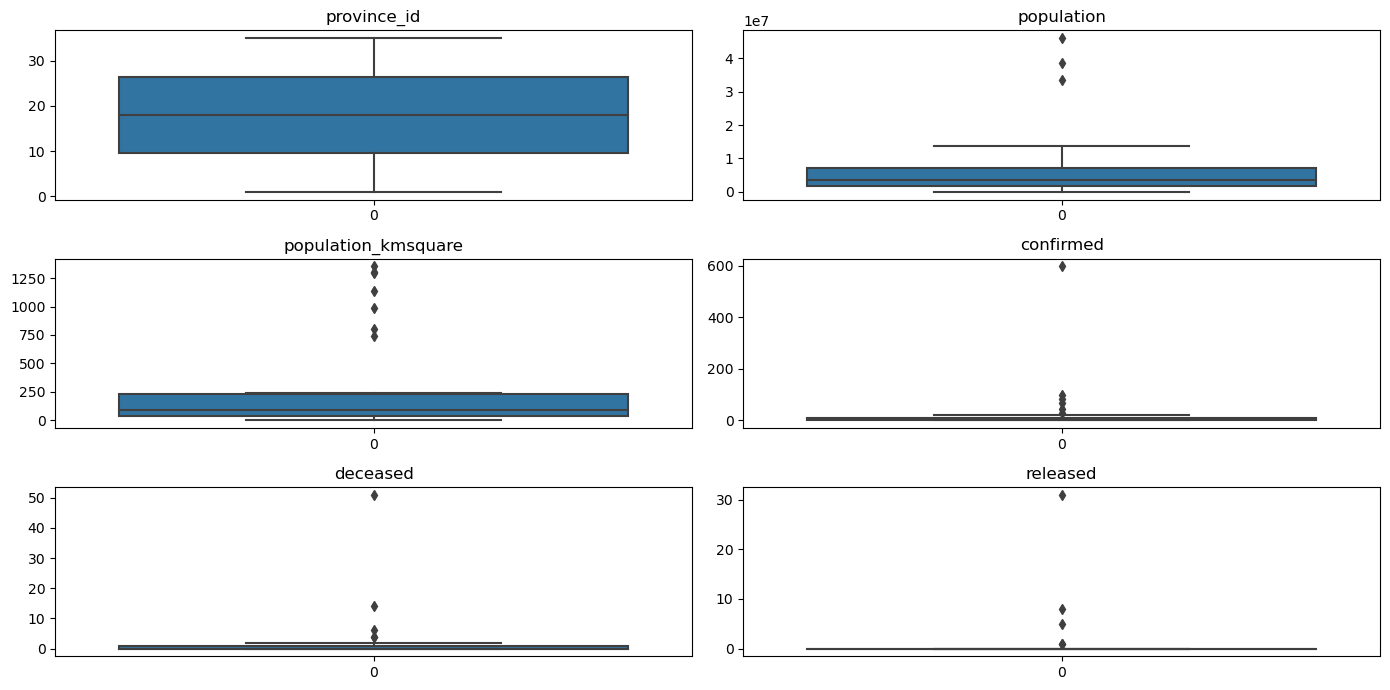

In [220]:
df_cont = df.drop(['province_name','island','iso_code','capital_city'], axis=1)
# Visualisasi boxplot untuk mendeteksi outlier
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 7))
feature_index = 0
for ii in range(3):
    for jj in range(2):
        if feature_index < len(df_cont.columns):
            ax = sns.boxplot(df_cont.iloc[:, feature_index], ax=axes[ii, jj])
            ax.set(title=df_cont.columns.values[feature_index])      
            feature_index += 1
plt.tight_layout()
plt.show()

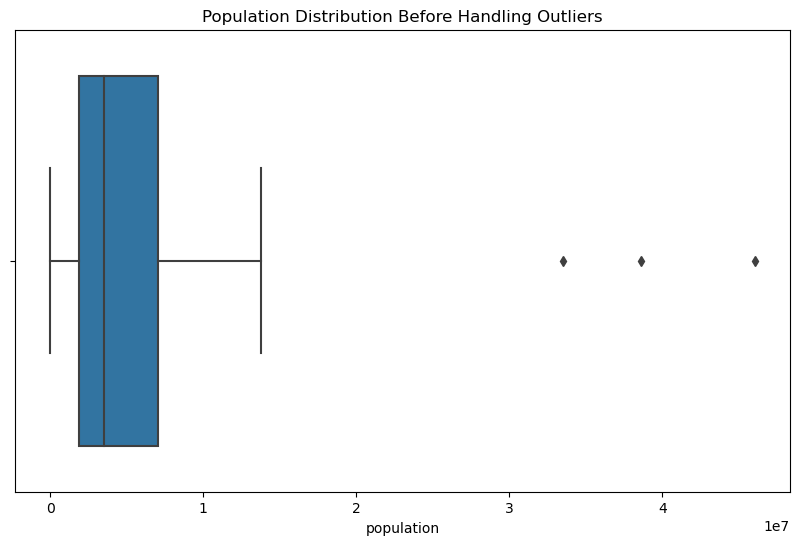

Ada 3 outlier dalam kolom 'population'. Kategorisasi tidak dilakukan.


In [221]:
# Visualize population before handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='population', data=df)
plt.title('Population Distribution Before Handling Outliers')
plt.show()

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Memeriksa apakah ada outlier pada kolom 'population'
outliers = detect_outliers(df, 'population')

if outliers.empty:
    print("Tidak ada outlier pada kolom 'population'. Melakukan kategorisasi...")
    
    # 1. Kategorisasi variabel 'population' ke dalam 3 kategori: Low, Medium, High
    bins = [0, 500000, 1000000, float('inf')]  # Definisikan batas untuk setiap kategori
    labels = ['Low', 'Medium', 'High']         # Label kategori
    df['population_category'] = pd.cut(df['population'], bins=bins, labels=labels)

    # 2. Menampilkan hasil kategorisasi
    print(df[['population', 'population_category']].head())

    # 3. Visualisasi distribusi kategori
    plt.figure(figsize=(10, 6))
    sns.countplot(x='population_category', data=df)
    plt.title('Population Category Distribution')
    plt.xlabel('Population Category')
    plt.ylabel('Count')
    plt.show()

else:
    print(f"Ada {len(outliers)} outlier dalam kolom 'population'. Kategorisasi tidak dilakukan.")

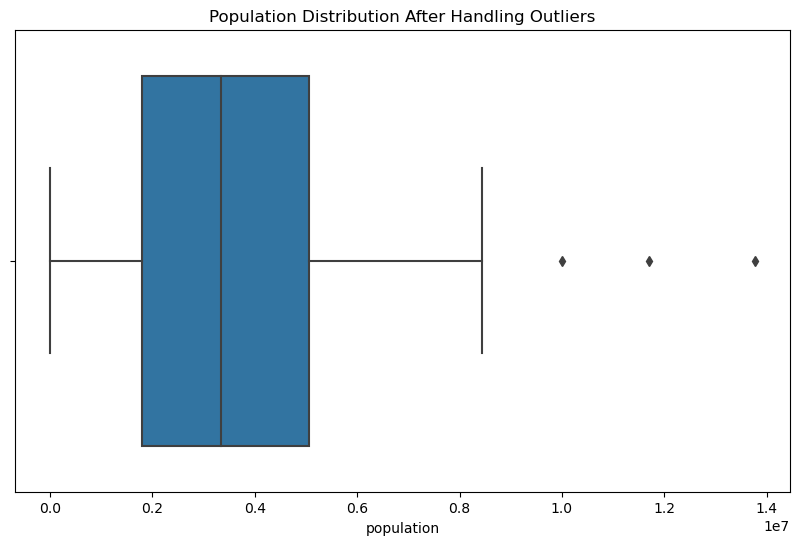

In [222]:
# Remove outliers for population
df_cleaned = remove_outliers(df, 'population')

# Visualize population after handling outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='population', data=df_cleaned)
plt.title('Population Distribution After Handling Outliers')
plt.show()

In [223]:
# Fungsi untuk menghilangkan outlier menggunakan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [224]:
# Mengatasi outlier jika ditemukan, untuk kolom population, confirmed, population_kmsquare
df_cleaned = df.copy()
for column in ['population', 'confirmed', 'population_kmsquare']:
    df_cleaned = remove_outliers(df_cleaned, column)

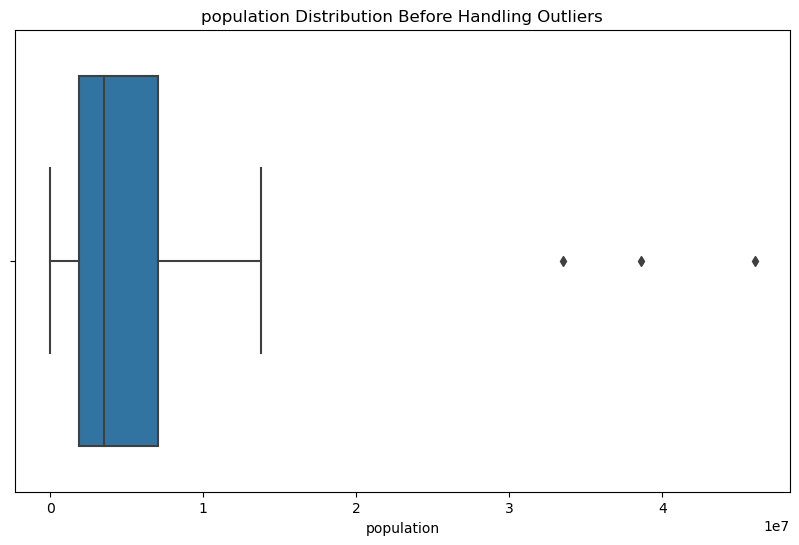

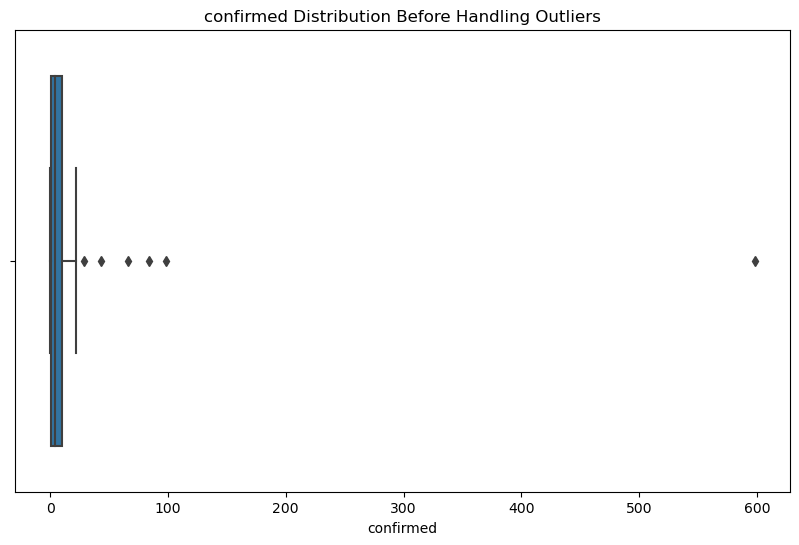

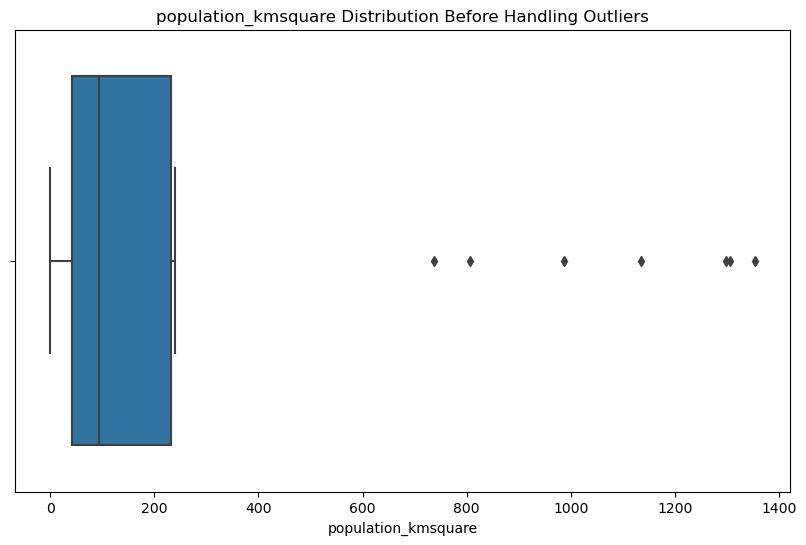

In [225]:
# Visualisasi data sebelum dan sesudah handling outlier
for column in ['population', 'confirmed', 'population_kmsquare']:
    # Visualisasi sebelum
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f'{column} Distribution Before Handling Outliers')
    plt.show()

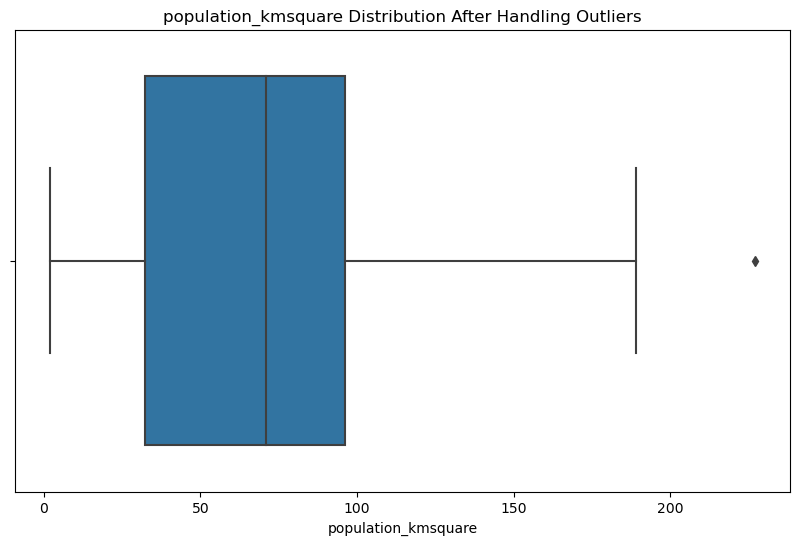

In [226]:
# Visualisasi sesudah
plt.figure(figsize=(10, 6))
sns.boxplot(x=column, data=df_cleaned)
plt.title(f'{column} Distribution After Handling Outliers')
plt.show()

In [227]:
# Jika tidak ada outlier, lakukan kategorisasi variabel
def categorize(df, column, bins, labels):
    df[column + '_category'] = pd.cut(df[column], bins=bins, labels=labels)
    return df
    if df.equals(df_cleaned):  # Tidak ada outlier yang dihapus
        # Contoh kategorisasi: Kategorisasi kolom population ke dalam 3 kelompok
        bins = [0, 500000, 1000000, float('inf')]  # Definisikan batas
        labels = ['Low', 'Medium', 'High']         # Definisikan label
        df_categorized = categorize(df, 'population', bins, labels)

        print(df_categorized[['population', 'population_category']].head())

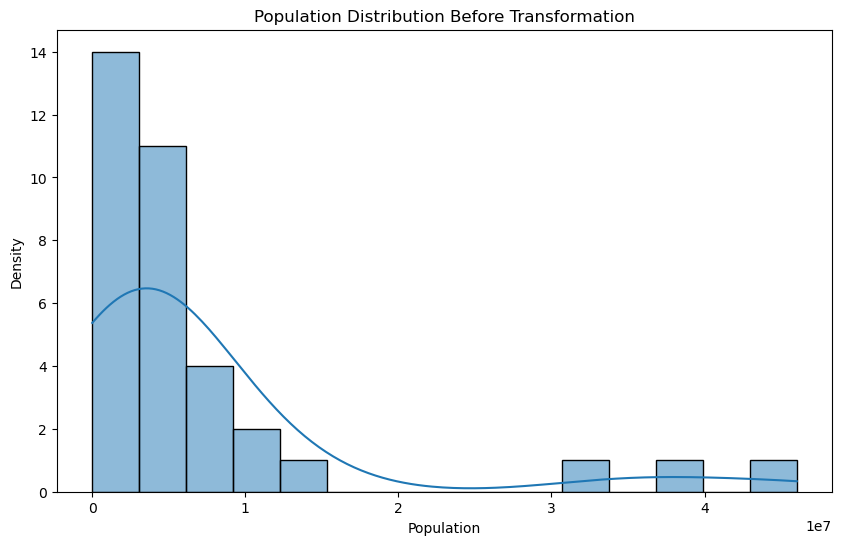

In [228]:
#Visualisasi Sebelum Transformasi
plt.figure(figsize=(10, 6))
sns.histplot(df['population'], kde=True)
plt.title('Population Distribution Before Transformation')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()

In [229]:
#Lakukan Transformasi Log (Log Transformation)
df['population_log'] = np.log(df['population'] + 1)  # Ditambah 1 untuk menghindari log(0)

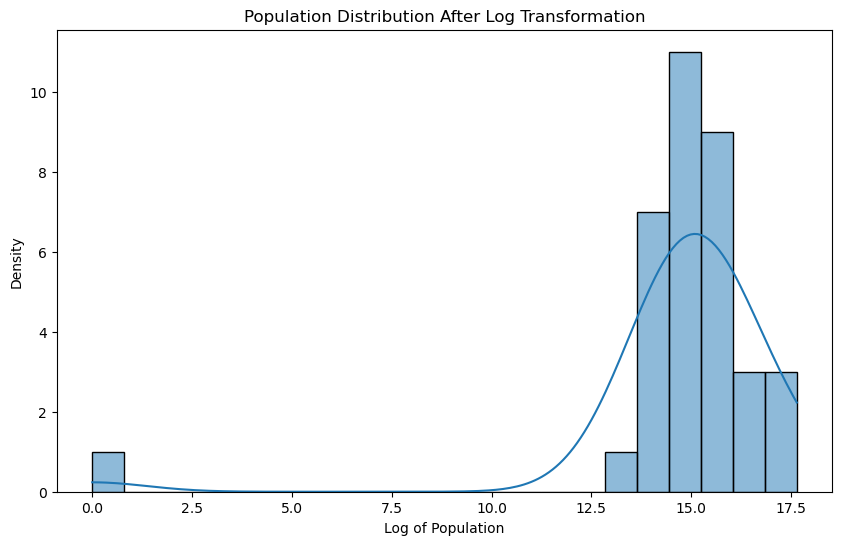

In [230]:
#Visualisasi Setelah Transformasi
plt.figure(figsize=(10, 6))
sns.histplot(df['population_log'], kde=True)
plt.title('Population Distribution After Log Transformation')
plt.xlabel('Log of Population')
plt.ylabel('Density')
plt.show()